 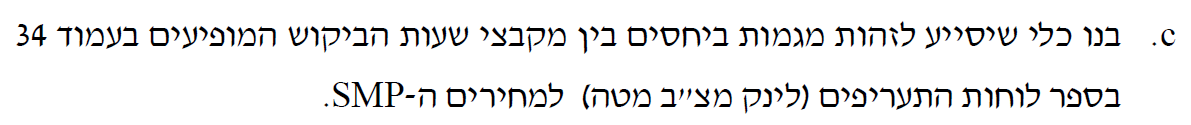

In [ ]:
# Imports
import pandas as pd
import plotly.graph_objects as go

# Permission to access my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

DEMAND_HOURS_PATH = "/content/drive/MyDrive/Doral_Energy/data/data_prep/demand_hours_data.csv"
SMP_PATH = "/content/drive/MyDrive/Doral_Energy/data/data_prep/data_smp.csv"



Mounted at /content/drive


#Load data

In [ ]:
df_demand_hours = pd.read_csv(DEMAND_HOURS_PATH)
df_demand_hours

,month,hour,is_weekday,is_peak_hour,weighted_prod_rate
0,12,00:00,1,0,19.42
1,12,01:00,1,0,19.42
2,12,02:00,1,0,19.42
3,12,03:00,1,0,19.42
4,12,04:00,1,0,19.42
...,...,...,...,...,...
571,11,19:00,0,0,18.64
572,11,20:00,0,0,18.64
573,11,21:00,0,0,18.64
574,11,22:00,0,0,18.64


**<h1>Data Explain</h1>**

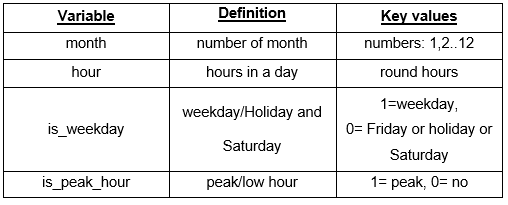

weighted_prod_rate - Demand hours rate. In page 34 of the rates book

In [ ]:
# add column of hour without minutes
df_demand_hours['hour_with_no_minutes'] = df_demand_hours['hour'].str.split(':').str[0]


In [ ]:


my_dict = {}
for index, row in df_demand_hours.iterrows():
  key = (row['month'], row['hour_with_no_minutes'], row["is_weekday"])
  value = row['is_peak_hour']
  my_dict[key] = value

print(my_dict)


{(12, '00', 1): 0, (12, '01', 1): 0, (12, '02', 1): 0, (12, '03', 1): 0, (12, '04', 1): 0, (12, '05', 1): 0, (12, '06', 1): 0, (12, '07', 1): 0, (12, '08', 1): 0, (12, '09', 1): 0, (12, '10', 1): 0, (12, '11', 1): 0, (12, '12', 1): 0, (12, '13', 1): 0, (12, '14', 1): 0, (12, '15', 1): 0, (12, '16', 1): 0, (12, '17', 1): 1, (12, '18', 1): 1, (12, '19', 1): 1, (12, '20', 1): 1, (12, '21', 1): 1, (12, '22', 1): 0, (12, '23', 1): 0, (12, '00', 0): 0, (12, '01', 0): 0, (12, '02', 0): 0, (12, '03', 0): 0, (12, '04', 0): 0, (12, '05', 0): 0, (12, '06', 0): 0, (12, '07', 0): 0, (12, '08', 0): 0, (12, '09', 0): 0, (12, '10', 0): 0, (12, '11', 0): 0, (12, '12', 0): 0, (12, '13', 0): 0, (12, '14', 0): 0, (12, '15', 0): 0, (12, '16', 0): 0, (12, '17', 0): 1, (12, '18', 0): 1, (12, '19', 0): 1, (12, '20', 0): 1, (12, '21', 0): 1, (12, '22', 0): 0, (12, '23', 0): 0, (1, '00', 1): 0, (1, '01', 1): 0, (1, '02', 1): 0, (1, '03', 1): 0, (1, '04', 1): 0, (1, '05', 1): 0, (1, '06', 1): 0, (1, '07', 1): 0,

In [ ]:
df_smp = pd.read_csv(SMP_PATH)
df_smp

,date,hour,smp_const,smp_no_const
0,01/01/2021,00:00,117.24,113.80
1,01/01/2021,00:30,114.10,112.70
2,01/01/2021,01:00,111.19,111.19
3,01/01/2021,01:30,100.81,100.81
4,01/01/2021,02:00,110.02,110.02
...,...,...,...,...
33447,30/11/2022,21:30,102.44,129.85
33448,30/11/2022,22:00,102.45,175.90
33449,30/11/2022,22:30,102.45,122.00
33450,30/11/2022,23:00,102.45,112.77


# Data Info

In [ ]:
print("Demand Hours Data Frame:")
df_demand_hours.info()
print("\n")
print("--------------------------------------------")
print("\n")
print("SMP Data Frame:")
df_smp.info()

Demand Hours Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month                 576 non-null    int64  
 1   hour                  576 non-null    object 
 2   is_weekday            576 non-null    int64  
 3   is_peak_hour          576 non-null    int64  
 4   weighted_prod_rate    576 non-null    float64
 5   hour_with_no_minutes  576 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 27.1+ KB


--------------------------------------------


SMP Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33452 entries, 0 to 33451
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          33452 non-null  object 
 1   hour          33452 non-null  object 
 2   smp_const     33452 non-null  float64
 3   smp_no_

In [ ]:
from datetime import datetime

# Extract the month and hour_with_no_minutes from df_smp
df_smp['date'] = pd.to_datetime(df_smp['date'], format='%d/%m/%Y')
df_smp['month'] = df_smp['date'].dt.month
df_smp['hour_with_no_minutes'] = df_smp['hour'].apply(lambda x: datetime.strptime(x, '%H:%M').strftime('%H'))


# Add to the data frame day_name column 
df_smp['day_name'] = df_smp['date'].dt.day_name()
# use the map() method to convert 'day_name' column to integer
df_smp['day_number'] = df_smp['day_name'].map({"Sunday": 1, "Monday": 2, "Tuesday": 3, "Wednesday": 4, "Thursday":5, "Friday": 6, "Saturday": 7})
# Determine the is_weekday value for each row in df_smp
df_smp['is_weekday'] = df_smp['day_number'].apply(lambda x: 1 if 0 < x < 6 else 0)

In [ ]:
df_smp.drop(['day_name', 'day_number'], axis=1, inplace=True)
df_smp 

,date,hour,smp_const,smp_no_const,month,hour_with_no_minutes,is_weekday
0,2021-01-01,00:00,117.24,113.80,1,00,0
1,2021-01-01,00:30,114.10,112.70,1,00,0
2,2021-01-01,01:00,111.19,111.19,1,01,0
3,2021-01-01,01:30,100.81,100.81,1,01,0
4,2021-01-01,02:00,110.02,110.02,1,02,0
...,...,...,...,...,...,...,...
33447,2022-11-30,21:30,102.44,129.85,11,21,1
33448,2022-11-30,22:00,102.45,175.90,11,22,1
33449,2022-11-30,22:30,102.45,122.00,11,22,1
33450,2022-11-30,23:00,102.45,112.77,11,23,1


In [ ]:
df_smp['is_peak_time'] = df_smp.apply(lambda row: my_dict.get((row['month'], row['hour_with_no_minutes'], row['is_weekday']), None), axis=1)
df_smp

,date,hour,smp_const,smp_no_const,month,hour_with_no_minutes,is_weekday,is_peak_time
0,2021-01-01,00:00,117.24,113.80,1,00,0,0
1,2021-01-01,00:30,114.10,112.70,1,00,0,0
2,2021-01-01,01:00,111.19,111.19,1,01,0,0
3,2021-01-01,01:30,100.81,100.81,1,01,0,0
4,2021-01-01,02:00,110.02,110.02,1,02,0,0
...,...,...,...,...,...,...,...,...
33447,2022-11-30,21:30,102.44,129.85,11,21,1,1
33448,2022-11-30,22:00,102.45,175.90,11,22,1,0
33449,2022-11-30,22:30,102.45,122.00,11,22,1,0
33450,2022-11-30,23:00,102.45,112.77,11,23,1,0


In [ ]:
# Correlation rates
df_smp.corr()

,smp_const,smp_no_const,month,is_weekday,is_peak_time
smp_const,1.000000,0.452126,-0.016623,0.040406,0.282705
smp_no_const,0.452126,1.000000,0.022049,0.051094,0.518988
month,-0.016623,0.022049,1.000000,-0.001639,-0.013333
is_weekday,0.040406,0.051094,-0.001639,1.000000,0.207839
is_peak_time,0.282705,0.518988,-0.013333,0.207839,1.000000


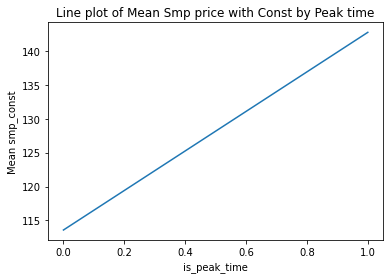

In [ ]:
import matplotlib.pyplot as plt

# group data by is_peak_time and calculate mean smp_const(MW) for each group
grouped = df_smp.groupby('is_peak_time')['smp_const'].mean()

# create line plot
plt.plot(grouped.index, grouped.values)

# set labels and title
plt.xlabel('is_peak_time')
plt.ylabel('Mean smp_const')
plt.title('Line plot of Mean Smp price with Const by Peak time')

# show plot
plt.show()

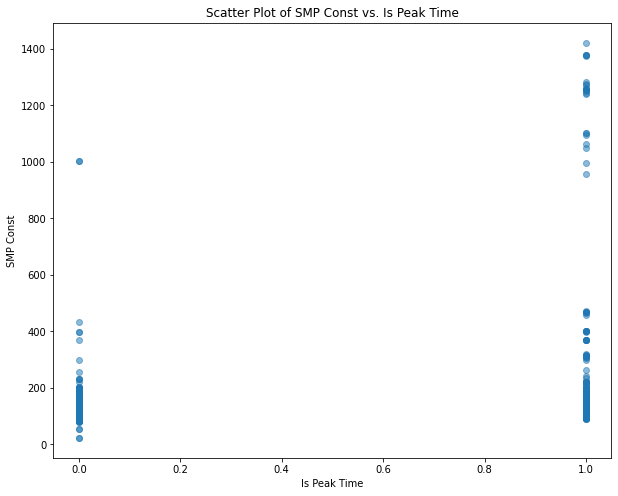

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a scatter plot
plt.scatter(df_smp['is_peak_time'], df_smp['smp_const'], alpha=0.5)

# Add labels and title
plt.xlabel('Is Peak Time')
plt.ylabel('SMP Const')
plt.title('Scatter Plot of SMP Const vs. Is Peak Time')

# Show the plot
plt.show()

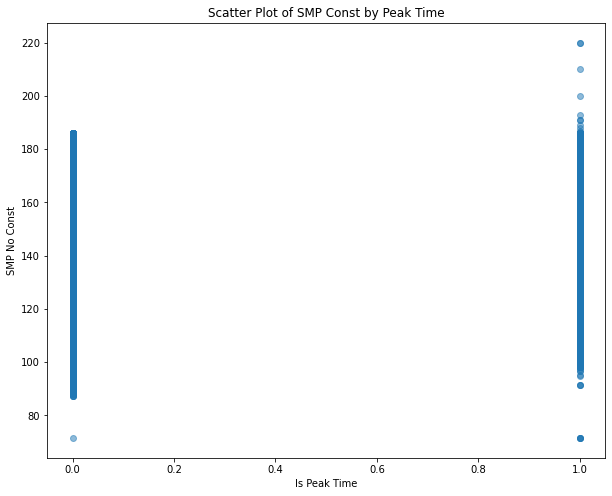

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a scatter plot
plt.scatter(df_smp['is_peak_time'], df_smp['smp_no_const'], alpha=0.5)

# Add labels and title
plt.xlabel('Is Peak Time')
plt.ylabel('SMP No Const')

plt.title('Scatter Plot of SMP Const by Peak Time')

# Show the plot
plt.show()

Text(0, 0.5, 'smp_no_const(MW)')

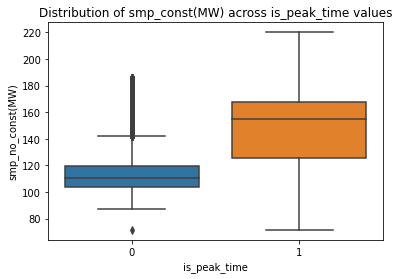

In [ ]:
import seaborn as sns

# Create the box plot
sns.boxplot(x="is_peak_time", y="smp_no_const", data=df_smp)

# Set the title and labels for the plot
plt.title("Distribution of smp_const across is_peak_time values")
plt.xlabel("is_peak_time")
plt.ylabel("smp_no_const")

In [ ]:
df_smp.to_csv('smp_prices_in_peak_time.csv', index=False)